# The Finite Double Square Well
### Erik S. S&oslash;rensen, Physics & Astronomy, McMaster University,  October 26, 2019
#### Last Edit: Pat Clancy - November 10, 2023

In this exercise we will solve the Schr&ouml;dinger equation using the method described in problem 2.61 in Griffiths (3rd ed). As usual, we will use a discrete grid with spacing $h$. The second derivative can then be approximated as $(-2\psi_j+\psi_{j+1}+\psi_{j-1})/h^2$. If we discretize $\psi$ on the interval $-W,W$ in $N$ points then it is easy to see that Schr&ouml;dinger's equation becomes an eigenvalue equation for an $N\times N$ matrix as explained in problem 2.61. We shall then be looking at problem 2.47 in Griffiths (3rd ed) using this method. This problem is concerned with studying a **Double Finite Square Well**. 

**ACTION:** Let's start by importing our values and defining our double finite square well potential.

**Going negative to positive:** a is the left wall of the first well, b is the right wall, c is the left wall of the second well, and d is the right wall:

In [5]:
from pylab import *
import scipy.linalg as spla
import matplotlib.pyplot as plt
import numpy as np
 
def V(x):
    global a,b,c,d 
    if (x<a):
        return 0.0
    elif (x<b):
        return -V0
    elif (x<c):
        return 0.0
    elif (x<d):
        return -V0
    else:
        return 0.0
    
V_vec = np.vectorize(V)

Note the definiton of a new function **V_vec** which we need to evaluate the potential on a vector of x-values.

Next we define 4 points a,b,c,d which are the left and right walls of the first well and the left and right walls of the second well, respectively. Since we want to look for bound states we need to solve Schrödinger's equation on an interval larger than the extent of the wells. We set the interval to be $-W,W$ with $W=\mathrm{Max}(|a|,|b|,|c|,|d|)$. We also define $V_0$, the depth of the two wells, and the number of discretization steps.

In [19]:
a=-1.0      #left wall first well
b=0.0      #right wall first well
c=0.0       #left wall second well
d=1.0       #right wall second well
V0=10     #Depth of wells
W = 3*max(abs(a),abs(b),abs(c),abs(d))   #Width of region to look for solutions
steps = 4000   #Number of discretization steps
xvec=np.linspace(-W,W,steps,dtype=np.dtype('f8'))  #discretized x-points
h=xvec[1]-xvec[0]  #spacing between discrete x-points

It is now very simple to write the matrix that describes the Hamiltonian. We start by evaluating the potential in all the discrete points. The second derivative is -2 on the diagonal and 1 just above and below the diagonal. This can very efficiently be written as shown below, which allows us to define the final Hamiltonian.

In [20]:
Pot_vec = V_vec(xvec)    #Evaluate potential in discrete x-points
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)\
   +np.diag(np.ones(steps-1),-1))/(double)(h*h)   #discrete second derivative written as matrix
Hamiltonian= -0.5*Laplacian+np.diag(Pot_vec) #The Hamiltonian

Python has access to very efficient routines for finding eigenvalues and eigenvectors in the package **scipy.linalg** which is imported as **spla**.  The complete diagonalization can be done in a single command. Since most of the eigenvalues are positive, and therefore correspond to scattering states which we cannot treat with this method, we only list the first 10 and focus on the bound states with $E<0$.

In [21]:
Eigs,Vecs=spla.eigh(Hamiltonian)
for E in Eigs[0:10]:
        print( '%11.7f' % E)

 -9.1802617
 -6.7790676
 -3.0541298
  0.5347773
  1.2251742
  2.2121630
  4.3346015
  5.6698239
  8.3526983
 10.8036748


As usual we can plot the first few eigenstates.

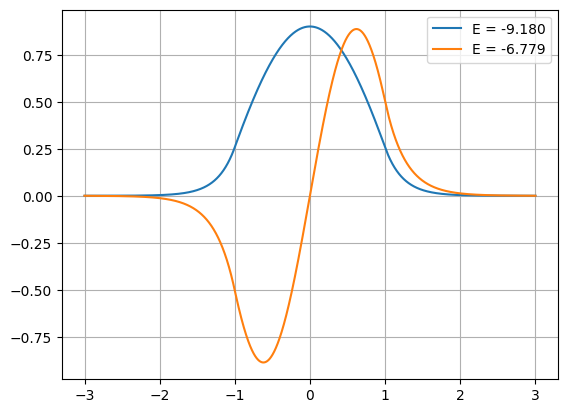

In [22]:
for i in range(2):
        psi = Vecs[:,i]
        norm = h*np.sum(np.square(psi))
        psi = psi/sqrt(norm)
        plt.plot(xvec, psi, label="E = %.3f"%Eigs[i])
plt.legend()
plt.grid(True)
plt.show()

# Question 1

First set the separation between the wells equal to $0$ by setting $a=-1$, $b=c=0$ and $d=1$ with $V_0=-10$. Do the values you observe for the first 2 eigenvalues correspond to what you obtained studying the finite well?

# Question 2

Next consider the intermediate case where the width of the two wells is comparable to their separation. Set $a=-1.5$, $b=-0.5$, $c=0.5$ and $d=1.5$ with $V_0=-10$. What is the functional form of the wavefunction in the interval $-0.5$ to $0.5$ for the ground state and the first excited state?

# Question 3

Next let us analyze the case where there is a significant distance between the two wells by setting $a=-3$, $b=-2$, $c=2$ and $d=3$ with $V_0=-10$. What do you observe when you plot the first 2 wave-functions? Explain.

# Question 4

Now let's try something new! Modify the potential so that the two wells have different widths. Choose $a=-1.5$, $b=-0.5$, $c=0.5$ and $d=2.5$ but this time with $V_0=-5$. Where is the wave-function mostly likely to be located for the ground state and the first excited state?
Explain.